# Final Project Data Preprocessing - Intro to Machine Learning
CS-UY 4563 <br>
Spring 2021 <br>
Lujie Zhao, Sicong Liu <br>
April 28, 2021 <br>

This project is to predict whether the job candidate will be willing to work for the
company after training, or they plan to go to another company. The Github Repo can be found [here](https://github.com/LujieZ/cs4563-machine-learning).

In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Import Dataset

The dataset we are using is from [this kaggle website](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists), which includes 13 inputs (12 being valid) and one target (1 for looking for a job change and 0 for not looking for job change). We will use `aug_train.csv` for training and testing. 


In [2]:
# 1. Read the file into a pandas data frame and print the headers.
df = pd.read_csv("aug_train.csv")
# Encoding city feature using label encoder.
le = LabelEncoder()
df.loc[:,'city'] = le.fit_transform(df.loc[:,'city']) 
print(df.shape)
df_header = df.columns.values
print(df_header)

(19158, 14)
['enrollee_id' 'city' 'city_development_index' 'gender'
 'relevent_experience' 'enrolled_university' 'education_level'
 'major_discipline' 'experience' 'company_size' 'company_type'
 'last_new_job' 'training_hours' 'target']


In [3]:
print(df.head())
print(df.info())

   enrollee_id  city  city_development_index gender      relevent_experience  \
0         8949     5                   0.920   Male  Has relevent experience   
1        29725    77                   0.776   Male   No relevent experience   
2        11561    64                   0.624    NaN   No relevent experience   
3        33241    14                   0.789    NaN   No relevent experience   
4          666    50                   0.767   Male  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
3                 NaN        Graduate  Business Degree         <1   
4       no_enrollment         Masters             STEM        >20   

  company_size    company_type last_new_job  training_hours  target  
0          NaN             NaN    

In [4]:
# 2. Add another group to `major_discipline`
# Because we have some enrolleees with high school or lower degrees, they are self-educated
# and majors appearly don't apply to them.
df["major_discipline"] = df["major_discipline"].fillna("Not Applied")

# There's also typos in the `company_size` columns, and we need to replace `10/49` with
# `10-49`.
df["company_size"] = df["company_size"].replace("10/49","10-49")

# For columns experience and last_new_job, we can see there are approximated data for
# experience more than 20 years and last new jobs more then 4 years. As they are values to
# be determine, we will approximate them with 21 years and 5 years.
df["experience"] = df["experience"].replace([">20","<1"],["21","0"])
df["last_new_job"] = df["last_new_job"].replace([">4","never"],["5","0"])

print(df["major_discipline"].unique())
print(df["company_size"].unique())
print(df["experience"].unique())
print(df["last_new_job"].unique())

['STEM' 'Business Degree' 'Not Applied' 'Arts' 'Humanities' 'No Major'
 'Other']
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10-49' '100-500'
 '500-999']
['21' '15' '5' '0' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18' '19'
 '12' '3' '6' '9' '8' '20' nan]
['1' '5' '0' '4' '3' '2' nan]


In [5]:
# 3. Print unique values for each column.
# Since `entrollee_id` are identifiers for enrollees, it are not considered as a valid
# input. And for rest of the columns, `city`, `gender`, `relevent_experience`,
# `enrolled_university`, `education_level`, `major_discipline`, `company_size`,
# `company_type` have categorical values. Thus they need to be classified.
print(df["city"].unique())
print(df["gender"].unique())
print(df["relevent_experience"].unique())
print(df["enrolled_university"].unique())
print(df["education_level"].unique())
print(df["major_discipline"].unique())
print(df["company_size"].unique())
print(df["company_type"].unique())

[  5  77  64  14  50  57  49  83  91  13  26  47   4  95   2  48  99   6
  93   3 112   7 101 103  78  11 118 116  74  63  89  43  61  94 102  55
  30 121 120  85  31 111  45 114  42  98  56 119  70  90  51  39  36  68
  18  75  80  15  65 122  41   1  82 109  24  46  21  97 100   8  37 106
  10  66  29  84  38 117  40  28  22  17 115  53  69 113  87  76 107 104
 105 110  27  81  16  44  73  35  23  92  86  67  62  96  19  12  71   0
  34  58  88  33  79   9  59  32  60  52  20  25 108  72  54]
['Male' nan 'Female' 'Other']
['Has relevent experience' 'No relevent experience']
['no_enrollment' 'Full time course' nan 'Part time course']
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
['STEM' 'Business Degree' 'Not Applied' 'Arts' 'Humanities' 'No Major'
 'Other']
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10-49' '100-500'
 '500-999']
[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']


# Data Classification
Replace the text value with preset parameters. 

In [6]:
# 4. Replace different gender text with numbers.
# 0 - Female
# 1 - Male
# 2 - Other
df["gender"] = df["gender"].replace(["Female","Male","Other"], [0,1,2])
print(df["gender"].unique())

[ 1. nan  0.  2.]


In [7]:
# 5. Replace relevent experience text with numbers.
# 0 - No relevent experience
# 1 - Has relevent experience
df["relevent_experience"] = df["relevent_experience"].replace(["No relevent experience","Has relevent experience"],[0,1])
print(df["relevent_experience"].unique())

[1 0]


In [8]:
# 6. Replace current enrollment with numbers.
# 0 - no_enrollment
# 1 - Full time course
# 2 - Part time course
df["enrolled_university"] = df["enrolled_university"].replace(["no_enrollment","Full time course","Part time course"],[0,1,2])
print(df["enrolled_university"].unique())

[ 0.  1. nan  2.]


In [9]:
# 7. Replace education level with numbers.
# 1 - Primary School
# 2 - High School
# 3 - Graduate (Bachelor)
# 4 - Masters
# 5 - Phd
df["education_level"] = df["education_level"].replace(["Primary School","High School","Graduate","Masters","Phd"],[1,2,3,4,5])
print(df["education_level"].unique())

[ 3.  4.  2. nan  5.  1.]


In [10]:
# 8. Replace major disciplines with numbers.
# 0 - Not Applied
# 1 - Arts
# 2 - Business Degree
# 3 - Humanities
# 4 - No Major
# 5 - STEM
# 6 - Other
df["major_discipline"] = df["major_discipline"].replace(["Not Applied", "Arts", "Business Degree", "Humanities", "No Major", "STEM", "Other"],[0,1,2,3,4,5,6])
print(df["major_discipline"].unique())

[5 2 0 1 3 4 6]


In [11]:
# 9. Replace company sizes with numbers.
# 1 - <10
# 2 - 10-49
# 3 - 50-99
# 4 - 100-500
# 5 - 500-999
# 6 - 1000-4999
# 7 - 5000-9999
# 8 - 10000+
df["company_size"] = df["company_size"].replace(["<10","10-49","50-99","100-500","500-999","1000-4999","5000-9999","10000+"],[1,2,3,4,5,6,7,8])
print(df["company_size"].unique())

[nan  3.  1.  8.  7.  6.  2.  4.  5.]


In [12]:
# 10. Replace company types with numbers.
# 1 - Public Sector
# 2 - Pvt Ltd (Private Limited)
# 3 - Funded Startup
# 4 - Early Stage Startup
# 5 - NGO
# 6 - Other
df["company_type"] = df["company_type"].replace(["Public Sector","Pvt Ltd","Funded Startup","Early Stage Startup","NGO","Other"],[1,2,3,4,5,6])
print(df["company_type"].unique())

[nan  2.  3.  4.  6.  1.  5.]


In [13]:
# Check the table after classification.
print(df)

       enrollee_id  city  city_development_index  gender  relevent_experience  \
0             8949     5                   0.920     1.0                    1   
1            29725    77                   0.776     1.0                    0   
2            11561    64                   0.624     NaN                    0   
3            33241    14                   0.789     NaN                    0   
4              666    50                   0.767     1.0                    1   
...            ...   ...                     ...     ...                  ...   
19153         7386    55                   0.878     1.0                    0   
19154        31398     5                   0.920     1.0                    1   
19155        24576     5                   0.920     1.0                    1   
19156         5756    94                   0.802     1.0                    1   
19157        23834    95                   0.855     NaN                    0   

       enrolled_university 

# Deal with Null Values
Many data we have are with null values. A couple of ways we can go with it are:
- Add another group (new classification category)
    - Bad: Doesn’t give any information
    - Add `Not Applied` to Major_discipline only
- Use median for all data (classify them to the average group)
- Find K-Nearest Neighbors
- Drop all data containing NaN values

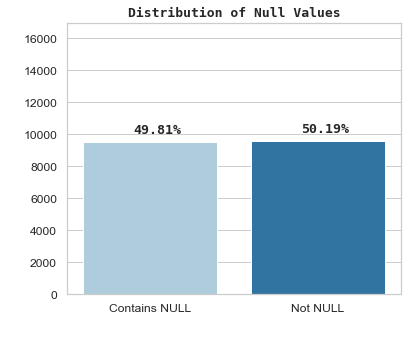

In [176]:
nums_true = df.isnull().any(axis=1).sum()
nums_false = df.shape[0]-nums_true
ax = sns.barplot(x=["Contains NULL","Not NULL"],y=[nums_true, nums_false],palette="Paired")
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig = plt.gcf()
fig.set_size_inches(6,5)
ax.set_ylim(top=17000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/df["target"].shape[0]), (p.get_x()+ 0.3, p.get_height()+500), fontweight="bold", fontfamily="monospace")
plt.title("Distribution of Null Values", fontsize=13, fontweight="bold", fontfamily="monospace")
plt.show()

In [26]:
# 11. Drop all null values and export data.
df_drop_null = df.copy()
df_drop_null = df_drop_null.dropna()
df_drop_null = df_drop_null.drop(columns=["enrollee_id"])
# print(df_drop_null)
# print(df_drop_null.info())

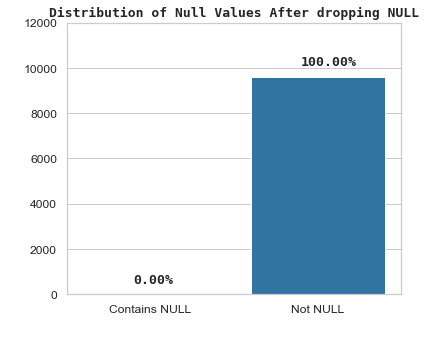

In [180]:
nums_true = df_drop_null.isnull().any(axis=1).sum()
nums_false = df_drop_null.shape[0]-nums_true
ax = sns.barplot(x=["Contains NULL","Not NULL"],y=[nums_true, nums_false],palette="Paired")
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig = plt.gcf()
fig.set_size_inches(6,5)
ax.set_ylim(top=12000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/df_drop_null["target"].shape[0]), (p.get_x()+ 0.3, p.get_height()+500), fontweight="bold", fontfamily="monospace")
plt.title("Distribution of Null Values After dropping NULL", fontsize=13, fontweight="bold", fontfamily="monospace")
plt.show()

In [134]:
# 12. Replace all null values with median.
df_replace_median = df.copy()
df_replace_median["gender"].fillna(df_replace_median["gender"].median(),inplace=True)
df_replace_median["enrolled_university"].fillna(df_replace_median["enrolled_university"].median(),inplace=True)
df_replace_median["education_level"].fillna(df_replace_median["education_level"].median(),inplace=True)
df_replace_median["experience"].fillna(df_replace_median["experience"].median(),inplace=True)
df_replace_median["company_size"].fillna(df_replace_median["company_size"].median(),inplace=True)
df_replace_median["company_type"].fillna(df_replace_median["company_type"].median(),inplace=True)
df_replace_median["last_new_job"].fillna(df_replace_median["last_new_job"].median(),inplace=True)
df_replace_median = df_replace_median.drop(columns=["enrollee_id"])
# print(df_replace_median)
# print(df_replace_median.info())

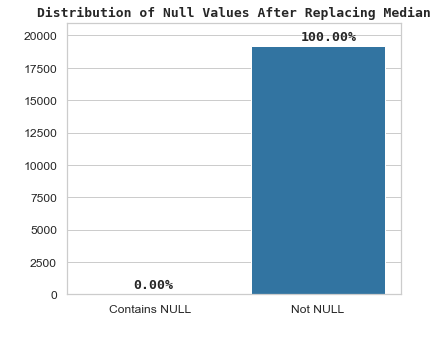

In [183]:
nums_true = df_replace_median.isnull().any(axis=1).sum()
nums_false = df_replace_median.shape[0]-nums_true
ax = sns.barplot(x=["Contains NULL","Not NULL"],y=[nums_true, nums_false],palette="Paired")
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig = plt.gcf()
fig.set_size_inches(6,5)
ax.set_ylim(top=21000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/df_replace_median["target"].shape[0]), (p.get_x()+ 0.3, p.get_height()+500), fontweight="bold", fontfamily="monospace")
plt.title("Distribution of Null Values After Replacing Median", fontsize=13, fontweight="bold", fontfamily="monospace")
plt.show()

## K-Nearest Neighbors


In [33]:
# 13. Replace all null values with KNN results.
# Code adapted from the source: https://www.kaggle.com/nkitgupta/who-will-leave-a-job#-k-Nearest-Neighbour-Imputation--
df_replace_knn = df.copy()
df_missing = df_replace_knn.columns[df_replace_knn.isna().any()].tolist()
df_missing_columns = df_replace_knn[["enrollee_id"] + df_missing]
df_full_columns = df_replace_knn.drop(df_missing, axis=1)
knn = KNNImputer(n_neighbors = 4)
features = np.round(knn.fit_transform(df_missing_columns))
df_missing_columns = pd.DataFrame(features, columns=df_missing_columns.columns)
df_replace_knn = pd.merge(df_missing_columns, df_full_columns, on="enrollee_id")
df_replace_knn = df_replace_knn.drop(columns=["enrollee_id"])
# print(df_replace_knn)
# print(df_replace_knn.info())

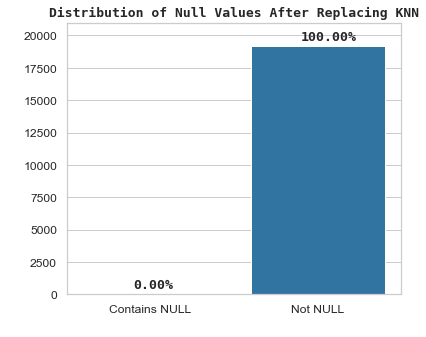

In [185]:
nums_true = df_replace_knn.isnull().any(axis=1).sum()
nums_false = df_replace_knn.shape[0]-nums_true
ax = sns.barplot(x=["Contains NULL","Not NULL"],y=[nums_true, nums_false],palette="Paired")
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig = plt.gcf()
fig.set_size_inches(6,5)
ax.set_ylim(top=21000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/df_replace_knn["target"].shape[0]), (p.get_x()+ 0.3, p.get_height()+500), fontweight="bold", fontfamily="monospace")
plt.title("Distribution of Null Values After Replacing KNN", fontsize=13, fontweight="bold", fontfamily="monospace")
plt.show()

# Deal with Imbalanced Data
Because our data is very imbalanced, we will use the following three ways to deal with the problem:
- Do nothing (go with natural distribution). We will just use the original data.
- Synthesize new miniority classes. In this case we need to perform to the train data in each algorithm.
- Adjust the class weight. Same as above, we need to adjust the weight to the train data in each algorithm.
- Randomly drop majority classes. Becuase we have a relatively large sample, we can afford dropping some data in the majority class. 

/Users/sue_z/.pyenv/versions/3.7.1/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


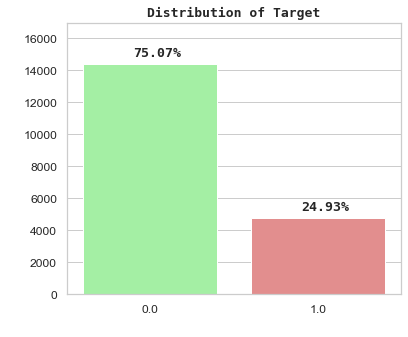

In [152]:
# Visualization of data in different classes.
palette1 = ["palegreen","lightcoral"]
ax = sns.countplot(df["target"], palette=palette1)
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig = plt.gcf()
fig.set_size_inches(6,5)
ax.set_ylim(top=17000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/df["target"].shape[0]), (p.get_x()+ 0.3, p.get_height()+500), fontweight="bold", fontfamily="monospace")
plt.title("Distribution of Target", fontsize=13, fontweight="bold", fontfamily="monospace")
plt.show()

/Users/sue_z/.pyenv/versions/3.7.1/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


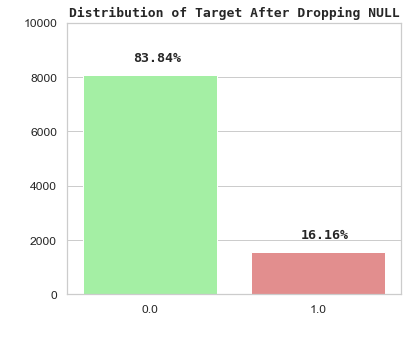

In [179]:
# Visualization of data in different classes.
palette1 = ["palegreen","lightcoral"]
ax = sns.countplot(df_drop_null["target"], palette=palette1)
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig = plt.gcf()
fig.set_size_inches(6,5)
ax.set_ylim(top=10000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/df_drop_null["target"].shape[0]), (p.get_x()+ 0.3, p.get_height()+500), fontweight="bold", fontfamily="monospace")
plt.title("Distribution of Target After Dropping NULL", fontsize=13, fontweight="bold", fontfamily="monospace")
plt.show()

# Data Export

In [35]:
df_drop_null.to_csv("data_drop_null.csv", index=False)
df_replace_median.to_csv("data_replace_median.csv", index=False)
df_replace_knn.to_csv("data_replace_knn.csv", index=False)